# 1. Importation des librairies

In [ ]:
# 1. Importation des Librairies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2. Chargement des donnees

In [12]:
# 2. Chargement des donnees
data = pd.read_csv('data/studentscores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des donnees

In [6]:
# 3. Analyse des donnees
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [8]:
data['Hours'].max()

9.2

In [9]:
data['Hours'].min()

1.1

In [15]:
print('Max Score : ',data['Scores'].max())

Max Score :  95


In [16]:
print('Min Hours : ',data['Scores'].min())

Min Hours :  17


# 4. Division des donnees

In [22]:
X = data.iloc[ : , :-1 ].values
y = data.iloc[ : , -1 ].values

In [19]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# 4.1 Separation de donnees : Train et Test

In [24]:
# X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [25]:
print('X-train Shape: ', X_train.shape)
print('X-test Shape: ', X_test.shape)
print('y-train Shape: ', y_train.shape)
print('y-test Shape: ', y_test.shape)

X-train Shape:  (18, 1)
X-test Shape:  (7, 1)
y-train Shape:  (18,)
y-test Shape:  (7,)


# 5. Construire le Modele

In [28]:
modele_lineaire = LinearRegression()

In [29]:
# Entrainement du modele
modele_lineaire.fit(X_train, y_train)

LinearRegression()

In [36]:
# Faire des predictions
y_score_pred = modele_lineaire.predict(X_test)

In [37]:
result = pd.DataFrame(y_test, y_score_pred)

In [38]:
result

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [41]:
# Evaluation du modele
print('MSE de la regression Lineaire :',mean_squared_error(y_test, y_score_pred))

MSE de la regression Lineaire : 51.90159659147336


In [42]:
print('R2 Score de la regression Lineaire :',r2_score(y_test, y_score_pred))

R2 Score de la regression Lineaire : 0.9168569951293908


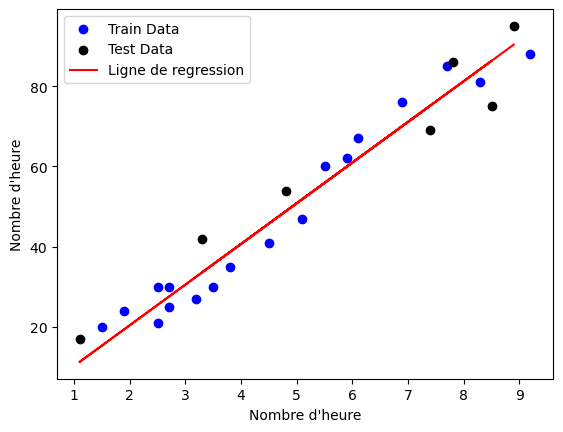

In [64]:
# 6. Visualisation de Resultats
plt.scatter(X_train,y_train,color='blue', label='Train Data')
plt.scatter(X_test,y_test,color='black', label='Test Data')
plt.plot(X_test, y_score_pred, color='red', label='Ligne de regression')
plt.xlabel('Nombre d\'heure')
plt.ylabel('Nombre d\'heure')
plt.legend()
plt.show()

# 7. Prediction simple

In [55]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [65]:
resultat = pd.DataFrame({'y-score-reel' : y_test,'y-score-predits': y_score_pred })
resultat 

,y-score-reel,y-score-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [59]:
y_score_pred

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [60]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [63]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [67]:
resultat['difference'] = resultat['y-score-reel'] - resultat['y-score-predits']
resultat

,y-score-reel,y-score-predits,difference
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639


In [68]:
# y = b0 + b1 * x1
b1 = modele_lineaire.coef_

In [69]:
b0 = modele_lineaire.intercept_